<a href="https://colab.research.google.com/github/caro28/stinky/blob/master/text_analysis_caroline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO
* filter out "car" or "truck" in rows with "gasoline" or "oil/petroleum" --> send this to csv that can be downloaded?
* use tfidf to build histograms showing distribution over time of top words (and other plots)? OR have this file download the top words, sorted, for use in other people's files?

In [ ]:
# load df_stinky and df_vessels from csv files saved to group github
import pandas as pd

url_stinky = 'https://raw.githubusercontent.com/ds5110/stinky/master/data/df_stinky.csv'
url_vessels = 'https://raw.githubusercontent.com/ds5110/stinky/master/data/df_vessels.csv'

df_stinky = pd.read_csv(url_stinky)
df_vessels = pd.read_csv(url_vessels)

In [ ]:
df_stinky

,Id,Report Source,Category,Created at local,Closed at local,Status,Address,smell description,URL,Latitude,Longitude,Export tagged places,date,time,Day,Month,Year,Hour,Month_name,Date & time (hour rounded),epoch time,date & time,smell value,zipcode,symptoms,additional comments
0,7181157.0,iPhone,Odor,2020-01-07 08:26:00,2020-01-07 09:20:00,Archived,315 Spring Street,Petroleum smell coming from south portland,https://crm.seeclickfix.com/#/organizations/61...,43.647740,-70.269455,City Council District 2,2020-01-07,08:26:00,7,1,2020,8,Jan,2020-01-07 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,7181402.0,Android,Odor,2020-01-07 09:11:00,2020-01-07 09:20:00,Archived,25 Cushman St,usual petroleum,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,2020-01-07,09:11:00,7,1,2020,9,Jan,2020-01-07 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,7192000.0,Android,Odor,2020-01-09 07:14:00,2020-01-09 08:45:00,Archived,25 Cushman St,usual petroleum,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,2020-01-09,07:14:00,9,1,2020,7,Jan,2020-01-09 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,7206428.0,Android,Odor,2020-01-13 08:22:00,2020-01-13 09:09:00,Archived,25 Cushman St,worst yet,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,2020-01-13,08:22:00,13,1,2020,8,Jan,2020-01-13 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,7210067.0,Android,Odor,2020-01-14 08:24:00,2020-01-14 14:50:00,Archived,25 Cushman St,usual petroleum stink. Cushman and Reiche play...,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,2020-01-14,08:24:00,14,1,2020,8,Jan,2020-01-14 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.651800,-70.273600,NaN,2021-07-22,19:10:56,22,7,2021,19,Jul,2021-07-22 19:00:00,1.626995e+09,2021-07-22 19:10:56,4.0,4102.0,NaN,NaN
2903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tank fumes,NaN,43.634000,-70.284900,NaN,2021-07-22,21:04:39,22,7,2021,21,Jul,2021-07-22 21:00:00,1.627002e+09,2021-07-22 21:04:39,5.0,4106.0,NaN,NaN
2904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petroleum smell most nites at 2am!!,NaN,43.642800,-70.245200,NaN,2021-07-23,02:05:15,23,7,2021,2,Jul,2021-07-23 02:00:00,1.627020e+09,2021-07-23 02:05:15,5.0,4106.0,NaN,NaN
2905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tar,NaN,43.632500,-70.273100,NaN,2021-07-23,08:28:44,23,7,2021,8,Jul,2021-07-23 08:00:00,1.627043e+09,2021-07-23 08:28:44,3.0,4106.0,NaN,NaN


In [ ]:
df_vessels.drop(labels='Unnamed: 0', axis=1, inplace=True)
df_vessels

,ARRIVAL DATE,ARRIVAL TIME (if avail),TERMINAL,SHIP NAME,LAST PORT OF CALL (if avail),PRODUCT TYPE - OIL,"PRODUCT AMOUNT - OIL, Incoming (Multiply metric tons by 7.5 for approx bbls)","PRODUCT AMOUNT - OIL, Outgoing",RUNNING TOTAL,PRODUCT TYPE - NON-OIL,"PRODUCT AMOUNT - NON OIL, Incoming","PRODUCT AMOUNT - NON OIL, Outgoing",Running Total (Specify units),Year,Month,Day,Month_name
0,2020-01-02,NaN,Citgo,New England,St.John,Unleaded Gasoline,80000.0,0.0,80000.0,NaN,NaN,NaN,NaN,2020,1,2,Jan
1,2020-01-02,NaN,Citgo,New England,St.John,Premium Unleaded Gasoline,20000.0,0.0,100000.0,NaN,NaN,NaN,NaN,2020,1,2,Jan
2,2020-01-02,NaN,Citgo,New England,St.John,Diesel (aka ULSD),22000.0,0.0,122000.0,NaN,NaN,NaN,NaN,2020,1,2,Jan
3,2020-01-02,NaN,Citgo,New England,St.John,Unleaded Gasoline,60000.0,0.0,182000.0,NaN,NaN,NaN,NaN,2020,1,2,Jan
4,2020-01-02,NaN,Citgo,New England,St.John,Unleaded Gasoline,20000.0,0.0,202000.0,NaN,NaN,NaN,NaN,2020,1,2,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,2021-05-29,NaN,Global,New England,NaN,"2 Fuel Oil (aka FO, MGO, DMA)",1525.0,0.0,32595056.0,NaN,NaN,NaN,NaN,2021,5,29,May
766,2021-05-29,NaN,Global,New England,NaN,6 Fuel Oil (aka IFO 380),2371.0,0.0,32597427.0,NaN,NaN,NaN,NaN,2021,5,29,May
767,2021-05-30,NaN,Global,New England,NaN,"2 Fuel Oil (aka FO, MGO, DMA)",1016.0,0.0,32598443.0,NaN,NaN,NaN,NaN,2021,5,30,May
768,2021-05-30,NaN,Global,New England,NaN,6 Fuel Oil (aka IFO 380),4540.0,0.0,32602983.0,NaN,NaN,NaN,NaN,2021,5,30,May


# Word cloud of smell descriptions

In [ ]:
# build word cloud of smell descriptions from merged df
import numpy as np

smell_txt = np.array(df_stinky['smell description'])

# inspect NaN value in smell_txt
type(smell_txt[2607])

float

In [ ]:
# convert NaN to 'None', for Word Cloud code to work
smell_txt = np.array(['None' if x is np.nan else x for x in smell_txt])
smell_txt[2607]

'None'

In [ ]:
'''
https://stackoverflow.com/questions/51860716/how-save-a-array-to-text-file-in-python/51860833
'''
# save tweet_text in txt file (required input for wordcloud)
with open("output.txt", "w") as txt_file:
  for item in smell_txt:
    if item != "None":
      txt_file.write("".join(item) + "\n")

(-0.5, 399.5, 199.5, -0.5)

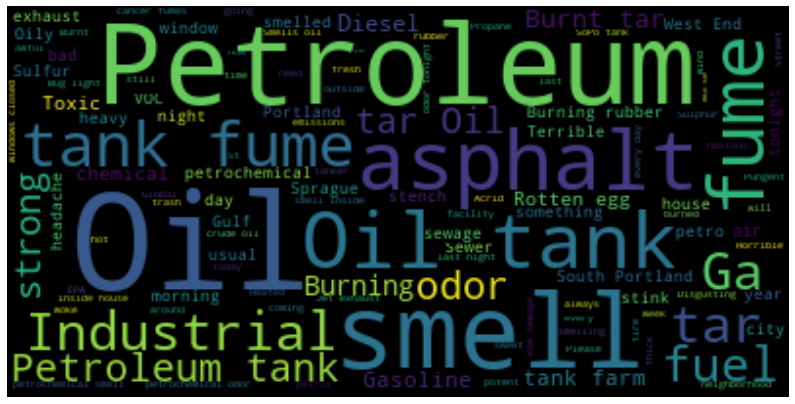

In [ ]:
'''
Word cloud for python by Andreas Mueller: http://amueller.github.io/word_cloud/
Example code used below: https://github.com/amueller/word_cloud/blob/master/examples/simple.py
'''
import os

from os import path
from wordcloud import WordCloud

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
text = open(path.join(d, '/content/output.txt')).read()

wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

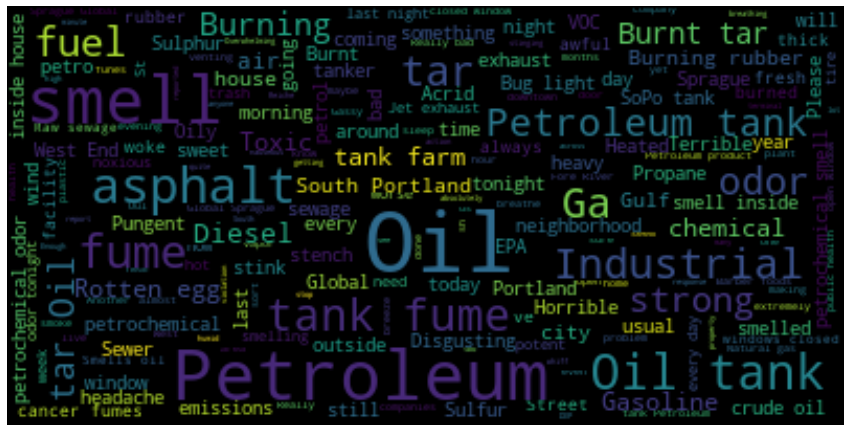

In [ ]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Dig into text of smell descriptions

In [ ]:
# find rows that mention petroleum or oil
#https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe
petr_oil_rows = df_stinky[df_stinky['smell description'].str.contains('petroleum|oil', na=False)]
print('There are {} complaints that mention petroleum or oil'.format(len(petr_oil_rows)))
petr_oil_rows.head()

There are 316 complaints that mention petroleum or oil


,Id,Report Source,Category,Created at local,Closed at local,Status,Address,smell description,URL,Latitude,Longitude,Export tagged places,date,time,Day,Month,Year,Hour,Month_name,Date & time (hour rounded),epoch time,date & time,smell value,zipcode,symptoms,additional comments
1,7181402.0,Android,Odor,2020-01-07 09:11:00,2020-01-07 09:20:00,Archived,25 Cushman St,usual petroleum,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,2020-01-07,09:11:00,7,1,2020,9,Jan,2020-01-07 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,7192000.0,Android,Odor,2020-01-09 07:14:00,2020-01-09 08:45:00,Archived,25 Cushman St,usual petroleum,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,2020-01-09,07:14:00,9,1,2020,7,Jan,2020-01-09 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,7210067.0,Android,Odor,2020-01-14 08:24:00,2020-01-14 14:50:00,Archived,25 Cushman St,usual petroleum stink. Cushman and Reiche play...,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,2020-01-14,08:24:00,14,1,2020,8,Jan,2020-01-14 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
5,7210906.0,Android,Odor,2020-01-14 11:10:00,2020-01-14 14:50:00,Archived,70 India St,India and Commercial. across from SoPo tanks. ...,https://crm.seeclickfix.com/#/organizations/61...,43.660821,-70.250651,City Council District 1,2020-01-14,11:10:00,14,1,2020,11,Jan,2020-01-14 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN
9,7253972.0,Android,Odor,2020-01-23 08:01:00,2020-01-23 15:00:00,Archived,104 Clark St,petroleum odor very strong Cushman/Clark/ Reic...,https://crm.seeclickfix.com/#/organizations/61...,43.648681,-70.265226,City Council District 2,2020-01-23,08:01:00,23,1,2020,8,Jan,2020-01-23 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# get dates with more than one petroleum or oil complaint
petroil_dupl_dates = np.array(petr_oil_rows.loc[petr_oil_rows['date'].duplicated()==True]['date'])
print('There are {} days with more than one complaint about a petroleum or oil smell'.format(len(petroil_dupl_dates)))

There are 104 days with more than one complaint about a petroleum or oil smell


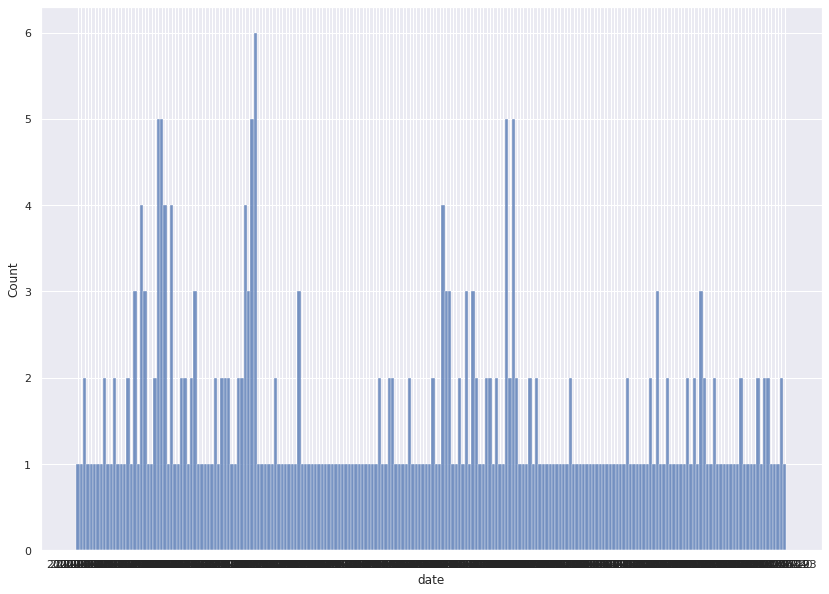

In [ ]:
# TODO: turn this into a FacetGrid showing histograms side by side of the top odor descriptions? Gasoline, Tar, Fuel, Industrial, etc?

# plot histogram showing count per day
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(14, 10)})
sns.histplot(data=petr_oil_rows, x='date', stat='count');

In [ ]:
# TODO: get oil vessel activity on dates with petroleum or oil complaints
#df_vessels.loc[df_vessels['ARRIVAL DATE'] in np.array(petr_oil_rows['date'].unique())]

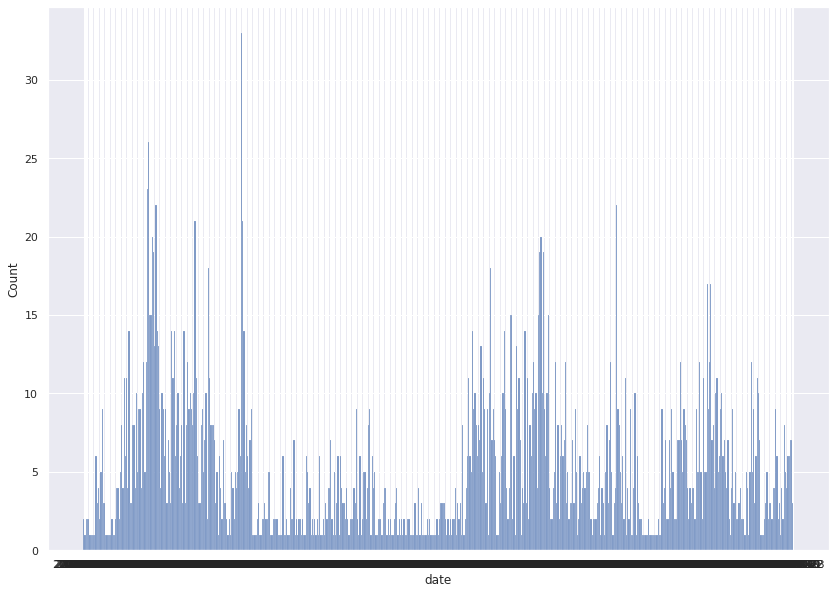

In [ ]:
# distribution of df_stinky complaints, by date
sns.histplot(data=df_stinky, x='date', stat='count');

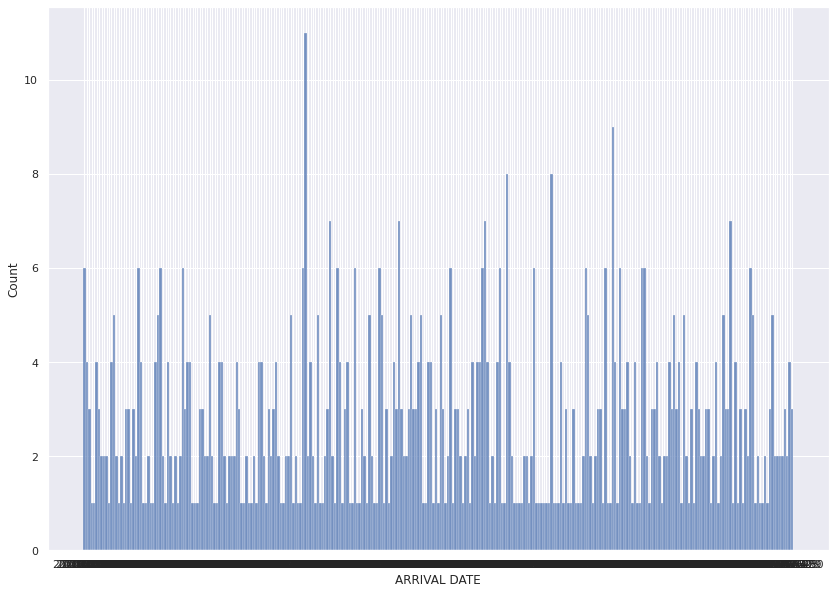

In [ ]:
# distribution of df_vessels arrivals, by date
sns.histplot(data=df_vessels, x='ARRIVAL DATE', stat='count');

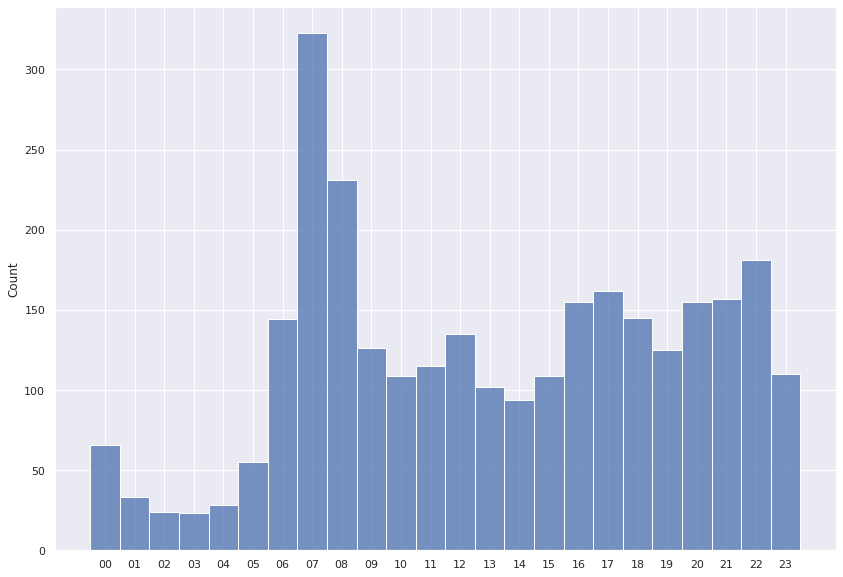

In [ ]:
# distribution of odor reports by time of day

# get time column as single hour value
time = np.sort(np.array(df_stinky['time'].str[0:2]))
hours = np.array(range(0,25))

sns.histplot(x=time, stat='count', bins=hours);

**NLP - build raw term frequencies of top words**

In [ ]:
# function for building tfidf vectorizer (Professor's code, from 11-NLP)
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

def build_tfidf(num_words):
  vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(num_words, num_words))

  # build sparse matrix using smell_text (array of all smell descriptions)
  sparse_matrix = vectorizer.fit_transform(smell_txt)

  feature_names = vectorizer.get_feature_names()

  # convert to ndarray, then sum terms
  a = sparse_matrix.toarray().sum(axis=0)
  print(sparse_matrix.shape)
  print(a.shape)

  # .argsort() -- returns indicies that would sort the array
  sorted_indices = np.argsort(-a)
  sorted_count = [a[i] for i in sorted_indices]
  sorted_features = [feature_names[i] for i in sorted_indices]
  print('Number of features:', len(sorted_features))
  print('First 10 counts:', sorted_count[:10])
  print('First 10 features:', sorted_features[:10])
  print('Last 10 counts:', sorted_count[-10:])
  print('Last 10 features:', sorted_features[-10:])

  return sorted_features, sorted_count

In [ ]:
# function for plotting most frequent terms as a bar chart (code from 11-NLP)
def plot_tfidf(sorted_features, sorted_count):
  plt.subplots(1,1,figsize=(12,5))
  plt.bar(sorted_features[:25], sorted_count[:25], 
          width=1, alpha=.5, edgecolor='black')
  plt.xticks(rotation=45);

(2907, 1220)
(1220,)
Number of features: 1220
First 10 counts: [464.3254413930643, 306.4301949166213, 163.2682838848256, 160.47520841122295, 139.8997551704175, 122.8935969148573, 112.0467217339407, 111.24965758864302, 87.78472362334769, 85.88392745712613]
First 10 features: ['oil', 'petroleum', 'tar', 'fumes', 'tanks', 'tank', 'asphalt', 'smell', 'industrial', 'gas']
Last 10 counts: [0.046146277929378386, 0.046146277929378386, 0.046146277929378386, 0.046146277929378386, 0.046146277929378386, 0.046146277929378386, 0.046146277929378386, 0.046146277929378386, 0.046146277929378386, 0.046146277929378386]
Last 10 features: ['neurotransmitters', 'tiny', 'neighbors', 'absorb', 'coincidence', 'committed', 'mist', 'connection', 'management', 'emit']
(2907, 2753)
(2753,)
Number of features: 2753
First 10 counts: [100.32293070148992, 94.91152728121436, 57.830201455666995, 53.287275917652295, 36.53437553185698, 35.14584481728599, 28.899636434786945, 26.049736159371076, 23.59209204285704, 21.5200135

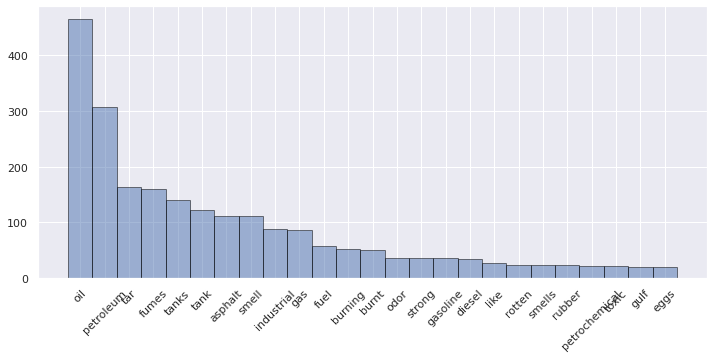

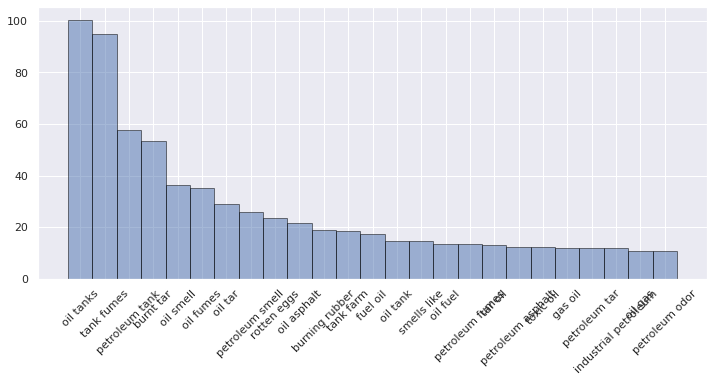

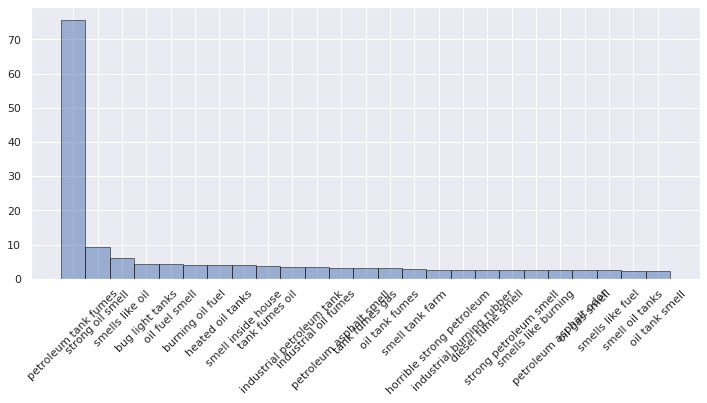

In [ ]:
# plot with ngram_range = (1,1) and (2,2)
for i in range(1, 4):
  num_words = i
  sorted_features, sorted_count = build_tfidf(num_words)
  plot_tfidf(sorted_features, sorted_count)